In [1]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast

canonical_smiles_maybe = 'O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)[N-]c2nccs2)cc1'
molecule = Chem.MolFromSmiles(canonical_smiles_maybe)
canonical_smiles = Chem.MolToSmiles(molecule, canonical=True)
canonical_smiles



'O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)[N-]c2nccs2)cc1'

In [17]:
# Load csv of proposed compounds
df = pd.read_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/Reductive_amination_136814_MCS_base.csv')
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference,total_structuralScore
0,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)","['O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1', '[NH3+][...",246.046237,True,1,1.305816
1,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C...",NaN,True,1,1.361872
2,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1nc(CN[C@@]23CC2NC3=O)sc1Br', 'Cc1nc(CN2C(...",NaN,True,1,1.074272
3,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)","['Cc1nc(CN[C@@H]2CCNC2=O)sc1Br', 'Cc1nc(CN2CC[...",NaN,True,1,1.201877
4,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(S)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(S...",NaN,True,1,1.155767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136809,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",['CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@...,715.339500,True,35,1.006949
136810,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",['CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@...,NaN,True,35,1.028243
136811,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",['CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C...,715.303114,True,35,1.007850
136812,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",['C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@...,NaN,True,35,1.089984


In [39]:
# Get the 'product_smi' column
product_smi_column = df['product_smi'][0:21]
# Flatten the list
flattened_list = []

for item in product_smi_column:
    print(item)
    item = ast.literal_eval(item)

    # Assuming the items are comma-separated strings, split them into lists
    if isinstance(item, str):
        flattened_list.extend(item.split(','))
    else:
        # Handle non-string items as needed
        flattened_list.append(item)

len(flattened_list)

['O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1', '[NH3+][C@H]1CCN(Cc2nc(CCl)cs2)C1=O']
['Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C)N2C(=O)[C@]3(N)CC23)n1', 'Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C)N2C(=O)[C@]3(N)CC23)n1']
['Cc1nc(CN[C@@]23CC2NC3=O)sc1Br', 'Cc1nc(CN2C(=O)[C@]3(N)CC23)sc1Br']
['Cc1nc(CN[C@@H]2CCNC2=O)sc1Br', 'Cc1nc(CN2CC[C@@H](N)C2=O)sc1Br']
['Cc1csc(C(S)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(S)N2C(=O)[C@]3(N)CC23)n1']
['Cc1csc(C(N)N[C@@H]2CCNC2=O)n1', 'Cc1csc(C(N)N2CC[C@@H](N)C2=O)n1']
['[CH]C([NH2+][C@H]1CCNC1=O)c1nc(C)cs1', '[CH]C(c1nc(C)cs1)N1CC[C@H]([NH3+])C1=O', '[CH]C([NH2+][C@H]1CCNC1=O)c1nc(C)cs1', '[CH]C(c1nc(C)cs1)N1CC[C@H]([NH3+])C1=O']
['[CH]C(N[C@@H]1CCNC1=O)c1nc(C)cs1', '[CH]C(c1nc(C)cs1)N1CC[C@@H](N)C1=O', '[CH]C(N[C@@H]1CCNC1=O)c1nc(C)cs1', '[CH]C(c1nc(C)cs1)N1CC[C@@H](N)C1=O']
['Cc1csc(C(S)N[C@@H]2CCNC2=O)n1', 'Cc1csc(C(S)N2CC[C@@H](N)C2=O)n1']
['Cc1csc(C(C)[NH2+][C@H]2CCNC2=O)n1', 'Cc1csc(C(C)N2CC[C@H]([NH3+])C2=O)n1', 'Cc1csc(C(C)[NH2+][C@H]2CCNC2=O)n1', 'Cc1cs

21

In [40]:
proposed = [sublist[0] for sublist in flattened_list]
len(proposed)

21

In [1]:
proposed = ['Cc1nc(CNC2CCN(O)C2=O)sc1Br', 'Cc1nc(CNC2CCN(O)C2=O)sc1C', 'O=C1C(NCc2nc(CO)cs2)CCN1O', 'Cc1csc(C(C)NC2CCN(O)C2=O)n1', 'Cc1nc(CNC2CC(=O)NC2=O)sc1Br', 'Cc1nc(CNC2CC(=O)NC2=O)sc1Br', 'O=C1CC(NCc2nc(CO)cs2)C(=O)N1', 'Cc1csc(C(C)NC2CC(=O)NC2=O)n1', 'Cc1nc(CNC2(C)CCNC2=O)sc1Br', 'Cc1nc(CNC2(C)CCNC2=O)sc1C']
proposed

['Cc1nc(CNC2CCN(O)C2=O)sc1Br',
 'Cc1nc(CNC2CCN(O)C2=O)sc1C',
 'O=C1C(NCc2nc(CO)cs2)CCN1O',
 'Cc1csc(C(C)NC2CCN(O)C2=O)n1',
 'Cc1nc(CNC2CC(=O)NC2=O)sc1Br',
 'Cc1nc(CNC2CC(=O)NC2=O)sc1Br',
 'O=C1CC(NCc2nc(CO)cs2)C(=O)N1',
 'Cc1csc(C(C)NC2CC(=O)NC2=O)n1',
 'Cc1nc(CNC2(C)CCNC2=O)sc1Br',
 'Cc1nc(CNC2(C)CCNC2=O)sc1C']

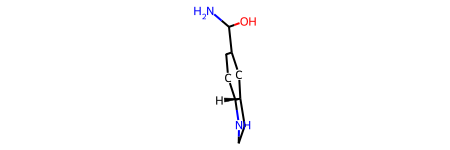

In [3]:
# Fragment inspiration
follow_ups = Chem.SDMolSupplier('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/D68EV3CPROA_combined.sdf')
base = follow_ups[2]
base

# RUNNING FRAGMENSTEIN

In [4]:
def run_fragmenstein(hits,  # list of rdkit mol objects of hits or base compound to help place
                     apo_file,  # path to pdb file for protein
                     work_path,
                     smiles,
                     name):
    Igor.init_pyrosetta()
    v = Victor(hits=hits, pdb_filename=apo_file)
    v.work_path = work_path
    v.place(smiles, long_name=name)

In [5]:
# Placement of elaborated compounds with Fragmenstein
follow_ups = Chem.SDMolSupplier('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/D68EV3CPROA_combined.sdf')
base = follow_ups[2]

apo_file = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/D68EV3CPROA/d68_fragment_apofiles/D68EV3CPROA-x0771_0A_apo-desolv.pdb'

work_path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example_enaminebb/2_atoms_difference_placed'

i = 1
for smiles in proposed:
    name = 'base' + str(i)
    run_fragmenstein([base],
                     apo_file,
                     work_path,
                     smiles,
                     name)
    i += 1

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa